# Data Analysis - WeRateDogs Twitter

In this project, we analyse the data from WeRateDogs Twitter Archive along with additional data which we will gather through the project as this archive only contains basic information. We will wrangle the entire gathered data to create interesting & trustworthy analysis & visualizations.

## Gathering Data

Importing the required libraries for analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import tweepy
import json
import os
%matplotlib inline

1. Gathering WeRateDogs twitter archives

In [2]:
pd.set_option('display.max_colwidth', -1)
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.sample(5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085991960577/photo/1,9,10,a,None,None,None,None
1152,725786712245440512,NaN,NaN,2016-04-28 20:40:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Lillie. She's a Rutabagan Floofem. Poor pupper ate and then passed out. 11/10 relatable af https://t.co/uIdGqug9rw,NaN,NaN,NaN,https://twitter.com/dog_rates/status/725786712245440512/photo/1,11,10,Lillie,None,None,pupper,None
1604,685906723014619143,NaN,NaN,2016-01-09 19:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Olive. He's stuck in a sleeve. 9/10 damn it Olive https://t.co/NnLjg6BgyF,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/685906723014619143/photo/1,https://twitter.com/dog_rates/status/685906723014619143/photo/1",9,10,Olive,None,None,None,None
1574,687480748861947905,NaN,NaN,2016-01-14 03:45:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Another magnificent photo. 12/10 https://t.co/X5w387K5jr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687480748861947905/photo/1,12,10,None,None,None,None,None
51,882268110199369728,NaN,NaN,2017-07-04 16:01:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Alfy. You're witnessing his first watermelon experience. I think it was a success. 13/10 happy 4th Alfy 🇺🇸 https://t.co/fYP5RlutfA,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/882268110199369728/photo/1,https://twitter.com/dog_rates/status/882268110199369728/photo/1,https://twitter.com/dog_rates/status/882268110199369728/photo/1",13,10,Alfy,None,None,None,None


2. Gathering tweet image predictions

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
img_preds = requests.get(url, auth=('user', 'pass'))
content = img_preds.content
csv_file = open('img_preds.tsv', 'wb')
csv_file.write(content)
csv_file.close()

In [4]:
img_preds = pd.read_csv('img_preds.tsv', sep='\t')
img_preds.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
466,675015141583413248,https://pbs.twimg.com/media/CV4iqh5WcAEV1E6.jpg,1,street_sign,0.290091,False,golden_retriever,0.258372,True,sandbar,0.132173,False
744,687480748861947905,https://pbs.twimg.com/media/CYpsFmIWAAAYh9C.jpg,1,English_springer,0.472273,True,English_setter,0.166862,True,Brittany_spaniel,0.163411,True
115,667937095915278337,https://pbs.twimg.com/media/CUT9PuQWwAABQv7.jpg,1,hamster,0.172078,False,guinea_pig,0.094924,False,Band_Aid,0.059995,False
1228,745422732645535745,https://pbs.twimg.com/media/ClhGBCAWIAAFCsz.jpg,1,Labrador_retriever,0.663800,True,golden_retriever,0.308261,True,ice_bear,0.004269,False
1984,872122724285648897,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,1,basketball,0.808396,False,pug,0.066736,True,dalmatian,0.054570,True


3. Gathering data from twitter API

In [ ]:
from tweepy import OAuthHandler
from timeit import default_timer as timer

errors = []

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            errors.append(tweet_id)
            pass
end = timer()
print(end - start)
print(fails_dict)
print(len(errors))

5. Converting json data into a pandas dataframe

In [5]:
dict_api = []

with open('tweet_json.txt') as json_file:
    for line in json_file:
        data = json.loads(line)
        dict_api.append({'tweet_id' : data['id'],
                         'favorite_count' : data['favorite_count'],
                         'retweet_count' : data['retweet_count']})

api_dataframe = pd.DataFrame(dict_api)
api_dataframe.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35260,7445
1,892177421306343426,30517,5529
2,891815181378084864,22959,3656
3,891689557279858688,38521,7608
4,891327558926688256,36814,8207


## Assessing Data

In [6]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
img_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
api_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        877 non-null    int64
 1   favorite_count  877 non-null    int64
 2   retweet_count   877 non-null    int64
dtypes: int64(3)
memory usage: 20.7 KB


#### Quality
Table `twitter_archive`
- timestamp contains "+0000" for all observations. Hence we can assume that the timezone is the same for all, i.e +0000
- timestamp is of object datatype instead of datetime 
- tweets beyond August 1, 2017 not required
- all rows are not original ratings but retweets
- all rows do not contain tweets on dogs
- retweeted_status_id, retweeted_status_user_id & retweeted_status_timestamp would not be of use in our analysis

Table `img_preds`
- jpg_url does not contain much information
- img_num does not contain much information
- p2 all the way till p3_dog can be dropped as we will use only the output which has highest confidence score (p1) for analysis

Table `api_dataframe`
- NaN's in favourite_count & retweet_count

#### Tidiness

Table `twitter_archive`
- in_reply_to_status_id does not contain much information
- in_reply_to_user_id does not contain much information
- source column does not contain much information
- expanded_urls does not contain much information
- doggo, floofer, pupper, puppo does not contain much information

Table `api_dataframe` & `img_preds`
- join api_dataframe's favorite_count & retweet_count using tweet_id to form a master dataframe
- can combine `twitter_archive`, `api_dataframe` & `img_preds` into a single table using tweet_id

## Cleaning Data

#### Define
- Drop rows that do not contain much information - in_reply_to_status_id, in_reply_to_user_id, source, expanded_urls, doggo, floofer, pupper, puppo from `twitter_archive` table
- Drop jpg_url, img_num, p2, p2_cong, p2_dog, p3, p3_conf, p3_dog from `img_preds` table

#### Code

In [9]:
twitter_columns = ['in_reply_to_user_id', 'in_reply_to_status_id', 'source', 'expanded_urls', 'doggo', 'floofer', 'pupper', 'puppo']
twitter_archive.drop(twitter_columns, axis=1, inplace=True)

img_columns = ['jpg_url', 'img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
img_preds.drop(img_columns, axis=1, inplace=True)

#### Test

In [10]:
twitter_archive.head()

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,13,10,Phineas
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,13,10,Tilly
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,12,10,Archie
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,13,10,Darla
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,12,10,Franklin


In [11]:
img_preds.head()

,tweet_id,p1,p1_conf,p1_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,redbone,0.506826,True
2,666033412701032449,German_shepherd,0.596461,True
3,666044226329800704,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,miniature_pinscher,0.560311,True


#### Define
Extract gender using text column

#### Code

In [12]:
male_pronouns = ['He', 'he', 'him', 'his', "he's", 'himself']
female_pronouns = ['She', 'she', 'her', 'hers', 'herself', "she's"]

gender = []

for text in twitter_archive['text']:
    # Male
    if any(map(lambda v:v in male_pronouns, text.split())):
        gender.append('male')
    # Female
    elif any(map(lambda v:v in female_pronouns, text.split())):
        gender.append('female')
    # If group or not specified
    else:
        gender.append('NaN')

#add a new column for dog gender
twitter_archive['gender'] = gender

#### Test

In [13]:
twitter_archive.head()

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,gender
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,13,10,Tilly,female
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,12,10,Archie,male
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,13,10,Darla,female
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,12,10,Franklin,male


#### Define
Remove +0000 from timestamp column

#### Code

In [14]:
twitter_archive['timestamp'] = twitter_archive['timestamp'].map(lambda x: x.rstrip('+0000'))

#### Test

In [15]:
twitter_archive.head()

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,gender
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,13,10,Tilly,female
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,12,10,Archie,male
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,13,10,Darla,female
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,12,10,Franklin,male


#### Define
Convert timestamp column from object to datetime

#### Code

In [16]:
twitter_archive.timestamp = pd.to_datetime(twitter_archive.timestamp)

#### Test

In [17]:
twitter_archive.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

#### Define
Remove tweets beyond August 1, 2017 as they are not required

#### Code

In [18]:
twitter_archive = twitter_archive[twitter_archive['timestamp'] < "2017-08-01"]

#### Test

In [19]:
twitter_archive.timestamp > "2017-08-01"

2       False
3       False
4       False
5       False
6       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Name: timestamp, Length: 2354, dtype: bool

#### Define
Remove rows if retweeted using the retweeted_status_id column

#### Code

In [20]:
twitter_archive = twitter_archive[twitter_archive['retweeted_status_id'].isna()]

#### Test

In [21]:
print("Rows having no retweet ID: ", twitter_archive.retweeted_status_id.isna().sum())
print("Total number of rows in the dataset: ", twitter_archive.shape[0])

Rows having no retweet ID:  2173
Total number of rows in the dataset:  2173


#### Define
Remove tweets that donot contain dog ratings using `img_preds` table. Use only tweet ID's having p1_dog TRUE & extract only these ID's from the `twitter_archive` table

#### Code

In [22]:
dog_img_preds = img_preds[img_preds['p1_dog'] == True]
dog_img_preds

dog_tweets = twitter_archive.set_index('tweet_id').join(dog_img_preds.set_index('tweet_id'))
dog_tweets = dog_tweets[dog_tweets['p1_dog'].notna()]
dog_tweets.p1_dog.isna().sum()

0

#### Test

In [23]:
dog_tweets.sample(5)

,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,gender,p1,p1_conf,p1_dog
tweet_id,,,,,,,,,,,,
676811746707918848,2015-12-15 17:11:09,Say hello to Penny &amp; Gizmo. They are practicing their caroling. The ambition in the room is tangible. 9/10 for both https://t.co/aqBHjjh5VD,NaN,NaN,NaN,9,10,Penny,NaN,Chihuahua,0.440916,True
676101918813499392,2015-12-13 18:10:33,Meet Striker. He's ready for Christmas. 11/10 https://t.co/B3xxSLjQSH,NaN,NaN,NaN,11,10,Striker,NaN,Shih-Tzu,0.225848,True
876838120628539392,2017-06-19 16:24:33,This is Ginger. She's having a ruff Monday. Too many pupper things going on. H*ckin exhausting. 12/10 would snug passionately https://t.co/j211oCDRs6,NaN,NaN,NaN,12,10,Ginger,NaN,bloodhound,0.575751,True
891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,12,10,Franklin,male,basset,0.555712,True
670403879788544000,2015-11-28 00:48:35,This is Nigel. He accidentally popped his ball after dunking so hard the backboard shattered. 10/10 great great pup https://t.co/vSd1TWFK1I,NaN,NaN,NaN,10,10,Nigel,male,pug,0.802223,True


#### Define
Drop retweeted_status_id, retweeted_status_user_id & retweeted_status_timestamp as we are only using original tweets for our analysis and not retweets

#### Code

In [24]:
drop_retweet_columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
dog_tweets.drop(drop_retweet_columns, inplace=True, axis=1)

In [25]:
dog_tweets.reset_index(inplace=True)

#### Test

In [26]:
dog_tweets.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,gender,p1,p1_conf,p1_dog
0,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,male,Chihuahua,0.716012,True
1,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,male,basset,0.555712,True
2,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10,None,NaN,Chesapeake_Bay_retriever,0.425595,True
3,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,10,Jax,male,Appenzeller,0.341703,True
4,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13,10,None,NaN,Pomeranian,0.566142,True


#### Define
Add retweet count & favourite count using `api_dataframe` table by joining on tweet_id's.

#### Code

In [27]:
dog_tweets = dog_tweets.set_index('tweet_id').join(api_dataframe.set_index('tweet_id'))

In [28]:
dog_tweets.reset_index(inplace=True)

#### Test

In [29]:
dog_tweets.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,gender,p1,p1_conf,p1_dog,favorite_count,retweet_count
681,728046963732717569,2016-05-05 02:21:37,This is Raymond. He controls fountains with his tongue. 11/10 pretty damn magical https://t.co/9aMxSbOaAZ,11,10,Raymond,male,Newfoundland,0.255971,True,NaN,NaN
709,720059472081784833,2016-04-13 01:22:10,This is Charleson. He lost his plunger. Looked everywhere. Can't find it. So sad. 9/10 would comfort https://t.co/pRHX8yn9Yu,9,10,Charleson,male,Mexican_hairless,0.451852,True,NaN,NaN
639,739544079319588864,2016-06-05 19:47:03,This... is a Tyrannosaurus rex. We only rate dogs. Please only send in dogs. Thank you ...10/10 https://t.co/zxw8d5g94P,10,10,None,NaN,Labrador_retriever,0.967397,True,NaN,NaN
822,704871453724954624,2016-03-02 03:30:25,I found a forest Pipsy. 12/10 https://t.co/mIQ1KoVsmU,12,10,None,NaN,Norfolk_terrier,0.689504,True,NaN,NaN
557,751937170840121344,2016-07-10 00:32:46,This is Ruby. Her ice cube is melting. She doesn't know what to do about it. 11/10 https://t.co/Vfc3eAFl2q,11,10,Ruby,female,Lakeland_terrier,0.424168,True,NaN,NaN


#### Define
Remove rows containing NaN's in favourite_count & retweet_count

#### Code

In [30]:
dog_tweets = dog_tweets[dog_tweets['favorite_count'].notna()]

#### Test

In [31]:
dog_tweets.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,gender,p1,p1_conf,p1_dog,favorite_count,retweet_count
42,881666595344535552,2017-07-03 00:11:11,This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s,13,10,Gary,male,Saluki,0.529012,True,46379.0,9429.0
214,830583320585068544,2017-02-12 01:04:29,This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,13,10,Lilly,female,Labrador_retriever,0.908703,True,65557.0,16307.0
38,882762694511734784,2017-07-06 00:46:41,This is Gus. He's quite the cheeky pupper. Already perfected the disinterested wink. 12/10 would let steal my girl https://t.co/D43I96SlVu,12,10,Gus,NaN,Labrador_retriever,0.850050,True,25857.0,4310.0
339,802265048156610565,2016-11-25 21:37:47,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",11,10,None,NaN,Labrador_retriever,0.897162,True,6882.0,1366.0
170,841314665196081154,2017-03-13 15:47:01,This is Max. There's no way in h*ck you're taking his pacifier. Binky promises it's not happening. 13/10 very good stubborn boy https://t.co/9lVAqDEvZ5,13,10,Max,male,Afghan_hound,0.903712,True,15427.0,4466.0


## Saving the master dataset

In [32]:
dog_tweets.to_csv('twitter_archive_master.csv', index=False)

In [33]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,gender,p1,p1_conf,p1_dog,favorite_count,retweet_count
0,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,male,Chihuahua,0.716012,True,22959.0,3656.0
1,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,male,basset,0.555712,True,36814.0,8207.0
2,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10,None,NaN,Chesapeake_Bay_retriever,0.425595,True,18560.0,2747.0
3,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,10,Jax,male,Appenzeller,0.341703,True,10787.0,1778.0
4,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13,10,None,NaN,Pomeranian,0.566142,True,59383.0,16646.0


## Visualizations

1. Top 5 breeds of dogs on WeRateDogs's twitter

In [241]:
df['p1'].value_counts()

golden_retriever          65
Pembroke                  36
Labrador_retriever        35
Chihuahua                 20
chow                      20
                          ..
miniature_schnauzer       1 
Saint_Bernard             1 
curly-coated_retriever    1 
Appenzeller               1 
Norfolk_terrier           1 
Name: p1, Length: 97, dtype: int64

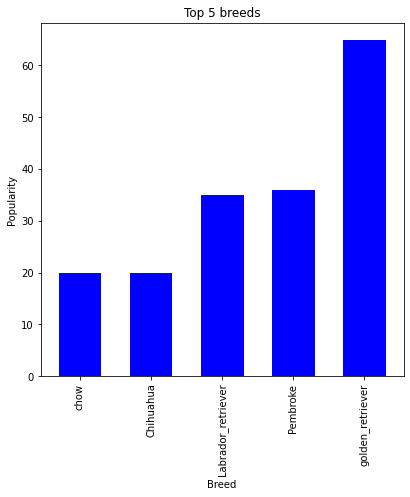

In [76]:
df['p1'].value_counts()[0:5].sort_values().plot(kind='bar', figsize=(6.5, 6.5), width=0.6, color='blue');
plt.xlabel('Breed');
plt.ylabel('Popularity');
plt.title('Top 5 breeds');

2. Relationship between favorite_count & retweet_count

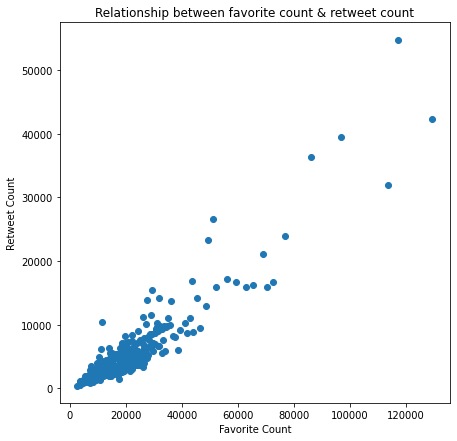

In [78]:
plt.figure(figsize=(7, 7));
plt.scatter(x=df['favorite_count'], y=df['retweet_count']);
plt.xlabel('Favorite Count');
plt.ylabel('Retweet Count');
plt.title('Relationship between favorite count & retweet count');